************************************************************
- <b>Author:-</b> Sunil Sharanappa
- <b>Linkedin:-</b> https://www.linkedin.com/in/sunil-sharanappa/
- <b>Github:-</b>   https://github.com/dataisamazing
- <b>Kaggle:-</b>   https://www.kaggle.com/sunilsharanappa
- <b>Profile:-</b>  https://www.sunilsharanappa.com
- <b>Ph:-</b>       +91 9731034714
************************************************************

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [4]:
#reading the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


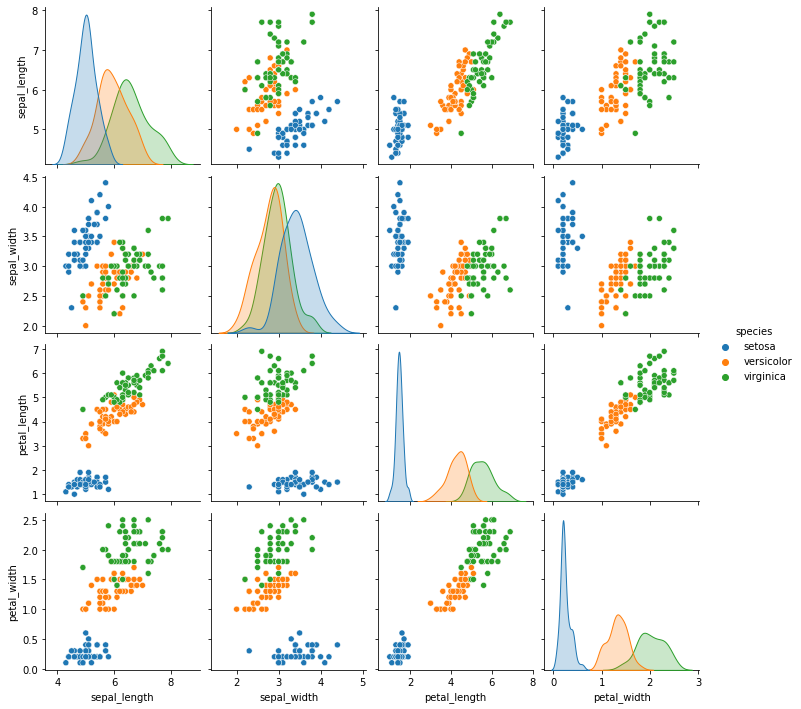

In [5]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'species')

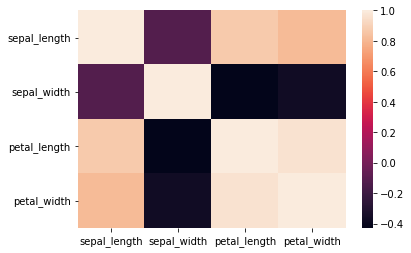

In [6]:
# correlation matrix
sns.heatmap(df.corr())

In [8]:
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)

# Defining the attributes
X = df1

#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
y = target

In [9]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


In [10]:
# Defining the decision tree 
algorithmdtree=DecisionTreeClassifier()
algorithmdtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [12]:
# Predicting the values of test data
y_pred = algorithmdtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

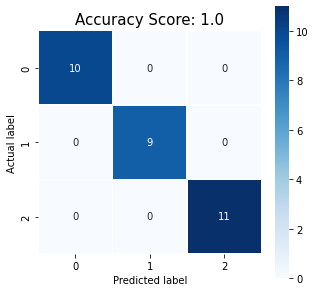

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(algorithmdtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

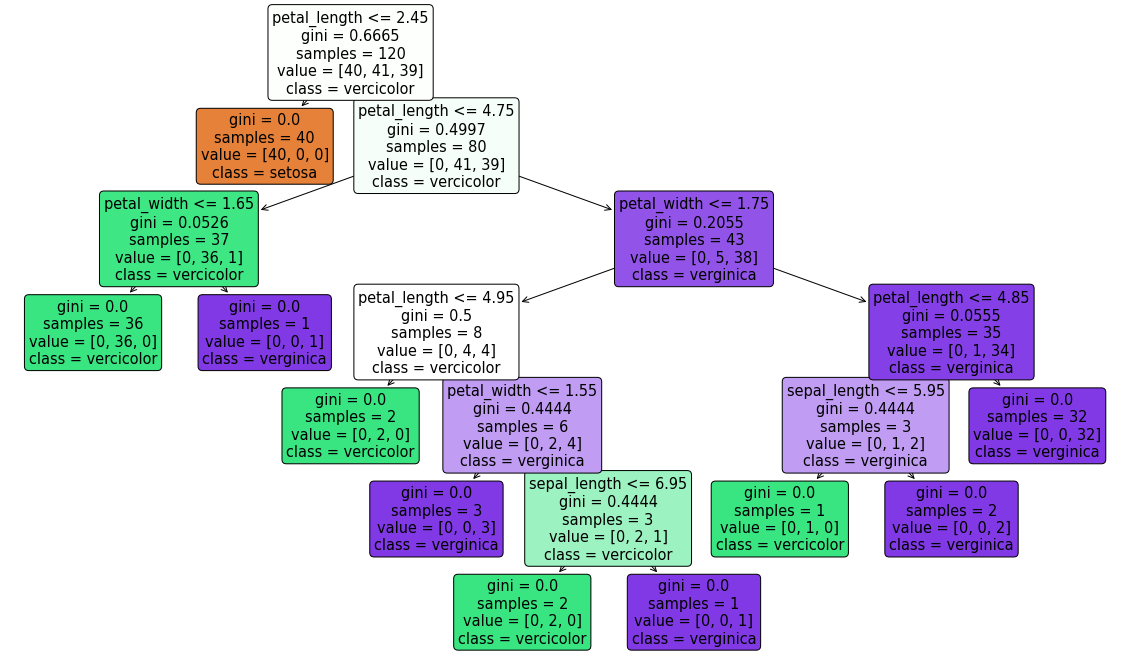

In [17]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
plt.figure(figsize=(20,12))
dec_tree = plot_tree(decision_tree=algorithmdtree, feature_names = df1.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)